In [89]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
solicitantes = pd.read_excel('/content/drive/MyDrive/Analitica de Negocios/Taller 1.xlsx')

In [91]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  8378 non-null   int64  
 1   Unnamed: 0    8378 non-null   int64  
 2   Edad          8378 non-null   int64  
 3   Hijos         8378 non-null   int64  
 4   Perscargo     8378 non-null   int64  
 5   Estrato       8378 non-null   int64  
 6   Ingresos      8378 non-null   int64  
 7   Egresos       8378 non-null   int64  
 8   Monto (EAD)   8378 non-null   float64
 9   Plazo         8378 non-null   int64  
 10  Cuota (COP)   8378 non-null   float64
 11  PreApr        5842 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 785.6 KB


In [92]:
solicitantes.shape

(8378, 12)

In [93]:
XD = solicitantes.dropna(subset='PreApr')
XD.shape

(5842, 12)

In [94]:
## Variables independientes
XD = XD[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [95]:
# Variable dependiente
yd = solicitantes['PreApr'].dropna()
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [96]:
import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)

In [97]:
XDArray

array([[3.80000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        2.81503004e+06, 4.80000000e+01, 8.26915062e+04],
       [5.10000000e+01, 6.00000000e+00, 1.00000000e+00, ...,
        6.30143930e+05, 3.60000000e+01, 2.27812126e+04],
       [3.70000000e+01, 2.00000000e+00, 0.00000000e+00, ...,
        1.28054021e+06, 3.60000000e+01, 4.62945962e+04],
       ...,
       [3.80000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.67726552e+06, 3.60000000e+01, 9.67895621e+04],
       [4.30000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        1.37511242e+06, 3.60000000e+01, 4.97136082e+04],
       [3.70000000e+01, 1.00000000e+00, 2.00000000e+00, ...,
        4.52536592e+06, 3.60000000e+01, 1.63602819e+05]])

In [98]:
ydArray

array([1., 1., 0., ..., 1., 1., 1.])

In [99]:
from sklearn.naive_bayes import GaussianNB

In [100]:
# Crear variable que aloja el modelo
modelNB = GaussianNB()

In [101]:
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [102]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

**MATRIZ DE CONFUSIÓN**

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [104]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

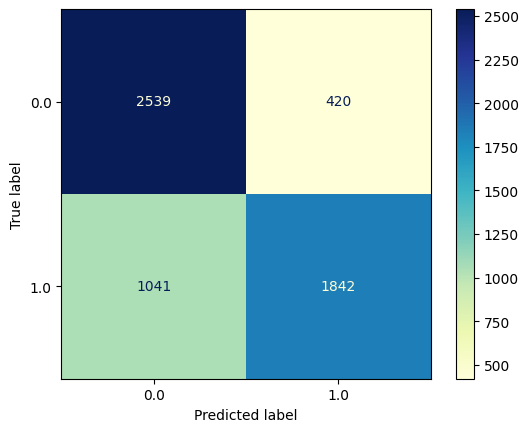

In [105]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelNB.classes_)
disp.plot(cmap="YlGnBu")
plt.show()

In [106]:
# METRICAS DE EVALUACIÓN

# Extraigo los valores de la matriz de confusión
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

# METRICAS

# Exactitud (Accuracy)
exactitud = (VN+VP)/cm.sum()
print(f'La exactitud (accurary) del modelo es de {exactitud:.2%}')

# Tasa de error
error = 1-exactitud
print(f'El error del modelo es de {error:.2%}')

# Precisión
precision = VP/(FP+VP)
print(f'La precision del modelo es de {precision:.2%}')

# Sensibilidad (Recall)
sensibilidad = VP/(VP+FN)
print(f'La sensibilidad del modelo es de {sensibilidad:.2%}')

# Especifilcidad
especificidad = VN/(VN+FP)
print(f'La especificidad del modelo es de {especificidad:.2%}')

La exactitud (accurary) del modelo es de 74.99%
El error del modelo es de 25.01%
La precision del modelo es de 81.43%
La sensibilidad del modelo es de 63.89%
La especificidad del modelo es de 85.81%


**ANALISIS DE LAS METRICAS**     

**Exactitud**: escenario 1 76.14%, nuevo escenario 74.99%<br>
Disminuyó ligeramente en el nuevo escenario, y esto puede ser ya que las variables agregadas no están contribuyendo de manera significativa a mejorar la capacidad del modelo para clasificar correctamente a los solicitantes.   

**Tasa de error**: escenario 1 23.86%, nuevo escenario 25.01%<br>
Su incrementó es debido a la disminución en la exactitud, esto indica que el modelo está clasificando más casos como incorrectos.   

**Presición**: escenario 1 81.01%, nuevo escenario 81.43%%<br>
Aumentó solo un poco, lo que puede significar que, de las personas clasificadas como preaprobadas, una proporción mayor es realmente correcta. Y esto se puede deber a que hubo una mejor identificación de los casos positivos verdaderos.   

**Sensibilidad**: escenario 1 67.46%, nuevo escenario 63.89%<br>
Tuvo una disminución significativa, lo que significa que el modelo está identificando a menos personas que realmente deberían ser preaprobadas. Esto podría deberse a que las nuevas variables añadidas están confundiendo al modelo en lugar de ayudarlo.

**Especifilidad**: escenario 1 84.59%, nuevo escenario 85.81%<br>
Mejoró, lo que indica que el modelo clasifica mejor a los casos prenegados gracias a las nuevas variables.



In [107]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]

In [108]:
XDGener.shape

(2536, 12)

In [109]:
XDGener = XDGener[['Edad', 'Hijos', 'Perscargo', 'Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)', 'Plazo', 'Cuota (COP)']]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [110]:
XDGenerArray = np.array(XDGener, dtype=float)
XDGenerArray

array([[3.80000000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        7.91312558e+05, 6.00000000e+01, 2.00941380e+04],
       [4.70000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.21301418e+05, 4.80000000e+01, 3.56322911e+03],
       [4.60000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        3.17445619e+06, 3.00000000e+00, 1.09005416e+06],
       ...,
       [3.20000000e+01, 0.00000000e+00, 1.00000000e+00, ...,
        1.01385156e+06, 3.60000000e+01, 3.66531625e+04],
       [3.50000000e+01, 2.00000000e+00, 1.00000000e+00, ...,
        2.15623904e+06, 1.80000000e+01, 1.37580518e+05],
       [2.40000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.90927674e+06, 3.60000000e+01, 6.90249281e+04]])

In [111]:
ydGener = modelNB.predict(XDGenerArray)

In [112]:
ydGenerSerie = pd.Series(ydGener, index = solicitantes[solicitantes['PreApr'].isna()].index)

In [113]:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

<ipython-input-113-88e48b22ac6f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [114]:
solicitantes.to_excel('solicitantes_completo_taller_1.xlsx')